In [2]:
import pandas as pd
import numpy as np

In [17]:
data=pd.read_csv("train.csv")

In [18]:
data.shape

(49000, 2)

In [21]:
data.head()

,filename,label
0,Images/train/0.png,4
1,Images/train/1.png,9
2,Images/train/2.png,1
3,Images/train/3.png,7
4,Images/train/4.png,3


In [7]:
import cv2
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator ,load_img
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [20]:
data["filename"]=data["filename"].apply(lambda x : "Images/train/"+x)

In [22]:
import glob
size=28,28
d=[]
#from PIL import Image
import numpy
for i in data["filename"]:
    im = cv2.imread(i)
    im= cv2.resize(im,size)
    np_i = numpy.array(im)
    np_i=np_i/255
    d.append(np_i)

In [25]:
images=np.array(d)

In [26]:
images.shape

(49000, 28, 28, 3)

In [27]:
labels=data["label"]

In [28]:
data["label"].nunique()

10

In [29]:
from keras.utils import to_categorical 
labels = to_categorical(labels,10)

In [31]:
import matplotlib.pyplot as plt

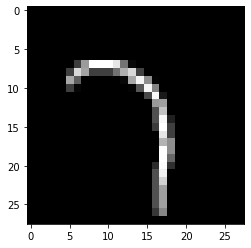

In [57]:
plt.imshow(images[3])

In [33]:
test=pd.read_csv("test.csv")

In [35]:
test["filename"]=test["filename"].apply(lambda x : "Images/test/"+x)

In [36]:
test.head()

,filename
0,Images/test/49000.png
1,Images/test/49001.png
2,Images/test/49002.png
3,Images/test/49003.png
4,Images/test/49004.png


In [38]:
test.shape

(21000, 1)

In [39]:
import glob
size=28,28
t=[]
#from PIL import Image
import numpy
for i in test["filename"]:
    im = cv2.imread(i)
    im= cv2.resize(im,size)
    np_i = numpy.array(im)
    np_i=np_i/255
    t.append(np_i)

In [40]:
test_images=np.array(t)

In [41]:
test_images.shape

(21000, 28, 28, 3)

In [42]:
def create_convolutional_model(classes):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(28,28,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))#to prevent neural network from overfitting
    
    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=256,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(classes,activation='softmax'))
    
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model 

In [43]:
classes=10
model = create_convolutional_model(classes)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 32)        416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
batch_normalization_2

In [44]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.fit(images,labels,batch_size=105,epochs=15,verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
 - 111s - loss: 0.1837 - acc: 0.9422
Epoch 2/15
 - 82s - loss: 0.0751 - acc: 0.9765
Epoch 3/15
 - 82s - loss: 0.0588 - acc: 0.9811
Epoch 4/15
 - 82s - loss: 0.0480 - acc: 0.9850
Epoch 5/15
 - 82s - loss: 0.0435 - acc: 0.9862
Epoch 6/15
 - 82s - loss: 0.0384 - acc: 0.9881
Epoch 7/15
 - 82s - loss: 0.0359 - acc: 0.9889
Epoch 8/15
 - 82s - loss: 0.0335 - acc: 0.9896
Epoch 9/15
 - 83s - loss: 0.0303 - acc: 0.9904
Epoch 10/15
 - 83s - loss: 0.0300 - acc: 0.9901
Epoch 11/15
 - 83s - loss: 0.0291 - acc: 0.9910
Epoch 12/15
 - 83s - loss: 0.0238 - acc: 0.9924
Epoch 13/15
 - 83s - loss: 0.0250 - acc: 0.9920
Epoch 14/15
 - 83s - loss: 0.0232 - acc: 0.9928
Epoch 15/15
 - 83s - loss: 0.0218 - acc: 0.9931


In [45]:
y=model.predict(test_images)

In [46]:
predicted = np.argmax(y, axis=1)

In [47]:
sub=pd.read_csv("test.csv")

In [49]:
sub["label"]=predicted

In [50]:
sub.head()

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


In [52]:
sub.to_csv("mysubmission.csv",index=False)